# Title: Credit_Score_Prediction

### Problem Statement: 

Create an accurate credit score prediction model using machine learning to enhance the credit assessment process. Overcome challenges such as handling diverse data, identifying crucial variables, and addressing data imbalances, missing values, and outliers. Measure success based on performance metrics and ensure scalability and adaptability to evolving datasets. Improve access to financial services and foster a fair and transparent lending ecosystem.

### Import Dependancies

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder, OrdinalEncoder, StandardScaler, PowerTransformer, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

### Reading Dataset

In [2]:
df = pd.read_csv("Credit_report.csv")
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [3]:
df.shape

(100000, 28)

### Interpretation: 

1. The dataset consists of 100,000 instances or observations, each representing a distinct entry or data point. These entries could be individuals, transactions, or any other unit of analysis, depending on the context of the dataset.
2. There are 28 columns or variables in the dataset, providing various types of information for each observation. These columns may include attributes such as demographic information, financial indicators, transactional details, or any other relevant data points. Each column provides a specific aspect of information that can be used for analysis or modeling purposes.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

### Interpretation: 

After examining the dataset, it appears that some columns are labeled as categorical variables, but upon closer inspection, the values inside these columns are numerical. This raises the question of whether these columns truly contain categorical values or if they were mistakenly labeled.

To investigate further, we can perform the following steps:
1. Check the unique values in the columns 

In [5]:
column = ["Age", "Annual_Income", "Num_of_Loan", "Num_of_Delayed_Payment", "Changed_Credit_Limit", "Outstanding_Debt", 
          "Amount_invested_monthly", "Monthly_Balance"]

for col in column:
    unique = df[col].unique()
    
    count = len(unique)
    
    print("Unique values in ", col, "is", count)

Unique values in  Age is 1788
Unique values in  Annual_Income is 18940
Unique values in  Num_of_Loan is 434
Unique values in  Num_of_Delayed_Payment is 750
Unique values in  Changed_Credit_Limit is 4384
Unique values in  Outstanding_Debt is 13178
Unique values in  Amount_invested_monthly is 91050
Unique values in  Monthly_Balance is 98793


### Interpretation: 
1. "Age": 1788 unique values - Since age is typically a continuous variable, it is more appropriate to treat it as numerical.
2. "Annual_Income": 18940 unique values - Annual income is a numerical measure and should be treated as such.
3. "Num_of_Loan": 434 unique values - The number of loans is a count variable and can be considered numerical, representing the discrete count of loans.
4. "Num_of_Delayed_Payment": 750 unique values - Similar to the number of loans, this count variable can be treated as numerical.
5. "Changed_Credit_Limit": 4384 unique values - Credit limits are usually continuous values, so it is reasonable to consider this column as numerical.
6. "Outstanding_Debt": 13178 unique values - Outstanding debt is also a numerical measure and should be treated as such.
7. "Amount_invested_monthly": 91050 unique values - This column likely represents continuous numerical values, such as the amount invested per month.
8. "Monthly_Balance": 98793 unique values - Monthly balance is another column that likely contains continuous numerical values.

### Convert the above categorical columns into numeric 

In [6]:
for col in column:
    df[col] = pd.to_numeric(df[col], errors = 'coerce')

### Checking Null Values

In [7]:
for i in df.columns:
    null = df[i].isnull().sum()
    
    if null != 0:
        print("The column",i,"has",null,"null values")

The column Name has 9985 null values
The column Age has 4939 null values
The column Annual_Income has 6980 null values
The column Monthly_Inhand_Salary has 15002 null values
The column Num_of_Loan has 4785 null values
The column Type_of_Loan has 11408 null values
The column Num_of_Delayed_Payment has 9746 null values
The column Changed_Credit_Limit has 2091 null values
The column Num_Credit_Inquiries has 1965 null values
The column Outstanding_Debt has 1009 null values
The column Credit_History_Age has 9030 null values
The column Amount_invested_monthly has 8784 null values
The column Monthly_Balance has 1209 null values


In [8]:
dup = df[df.duplicated()]
dup

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


### Checking Imbalance Data

In [9]:
imbalace_col = []
threshold = 0.70

for col in df.columns:
    value_count = df[col].value_counts()
    total_row = df.shape[0]
    count = total_row * threshold
    null_percentage = df[col].isnull().mean()*100
    
    if any(value_count > count) or (null_percentage > 50):
        imbalace_col.append(col)

print("Imbalance columns are:")
print(imbalace_col)

Imbalance columns are:
[]


### Interpretation: 

The dataset does not contain any column with a significant imbalance in the distribution of its values. This could indicate that the data is well-balanced and may not require any special treatment for handling imbalanced data.

### Checking unique values in each column

In [10]:
for col in df.columns:
    unique = df[col].unique()
    
    count = len(unique)
    
    print("Unique values in ", col, "is", count)

Unique values in  ID is 100000
Unique values in  Customer_ID is 12500
Unique values in  Month is 8
Unique values in  Name is 10140
Unique values in  Age is 1662
Unique values in  SSN is 12501
Unique values in  Occupation is 16
Unique values in  Annual_Income is 13438
Unique values in  Monthly_Inhand_Salary is 13236
Unique values in  Num_Bank_Accounts is 943
Unique values in  Num_Credit_Card is 1179
Unique values in  Interest_Rate is 1750
Unique values in  Num_of_Loan is 400
Unique values in  Type_of_Loan is 6261
Unique values in  Delay_from_due_date is 73
Unique values in  Num_of_Delayed_Payment is 699
Unique values in  Changed_Credit_Limit is 4376
Unique values in  Num_Credit_Inquiries is 1224
Unique values in  Credit_Mix is 4
Unique values in  Outstanding_Debt is 12204
Unique values in  Credit_Utilization_Ratio is 100000
Unique values in  Credit_History_Age is 405
Unique values in  Payment_of_Min_Amount is 3
Unique values in  Total_EMI_per_month is 14950
Unique values in  Amount_inve

### Interpretation: 

1. It is observed that the "Name" column does not provide any meaningful information. Additionally, the column contains null values that cannot be filled using the mode (most frequently occurring value). As a result, it is recommended to delete this column from the dataset.
2. The columns "ID" Customer_ID, SSN and "creating_utilization_ratio" contain unique values for each entry, implying that they serve as identifiers or unique identifiers for the dataset. As such, these columns may not provide significant variability or useful information for analysis and can be considered for removal.
3. Upon analyzing the "month" column, it has been determined that this column does not provide any relevant information that can be directly related to the credit score. Consequently, it is deemed appropriate to delete this column from the dataset.
4. Additionally, it is observed that the columns "Amount_invested_monthly" and "Monthly_Balance" have unique values for more than 90% of the dataset. This suggests that these columns do not exhibit significant variation and may not contribute much to the overall analysis or modeling process. Therefore, it might be beneficial to delete these columns from the dataset to simplify and streamline further analyses.

In [11]:
df = df.drop(["ID", "Customer_ID", "Month", "Name", "SSN", "Credit_Utilization_Ratio", "Amount_invested_monthly", 
              "Monthly_Balance"], axis=1)

### Checking Statistical Measurement 

In [12]:
df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Total_EMI_per_month
count,95061.000000,9.302000e+04,84998.000000,100000.000000,100000.00000,100000.000000,95215.000000,100000.000000,90254.000000,97909.000000,98035.000000,98991.000000,100000.000000
mean,110.934505,1.785790e+05,4194.170850,17.091280,22.47443,72.466040,2.780339,21.068780,31.033051,10.389025,27.754251,1426.503700,1403.118217
std,689.407864,1.442878e+06,3183.686167,117.404834,129.05741,466.422621,62.500940,14.860104,226.955758,6.789496,193.177339,1155.045753,8306.041270
min,-500.000000,7.005930e+03,303.645417,-1.000000,0.00000,1.000000,-100.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,0.000000
25%,24.000000,1.943560e+04,1625.568229,3.000000,4.00000,8.000000,1.000000,10.000000,9.000000,5.320000,3.000000,566.080000,30.306660
50%,33.000000,3.755074e+04,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,1166.370000,69.249473
75%,42.000000,7.284338e+04,5957.448333,7.000000,7.00000,20.000000,5.000000,28.000000,18.000000,14.870000,9.000000,1948.200000,161.224249
max,8698.000000,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,82331.000000


### Interpretation:

Upon observing the mean and standard deviation of multiple columns in the dataset, namely Age, Annual Income, Number of Bank Accounts, Number of Credit Cards, Interest Rate, Number of Loans, Delay from Due Date, Number of Delayed Payments, Number of Credit Inquiries, and Total EMI per Month, a significant difference between the mean and standard deviation is evident. The standard deviation values being larger than the mean values suggest a wide spread or variability in the values of each respective column.

This indicates that the individuals represented in the dataset are dispersed across a broad range in terms of their characteristics reflected in these columns. For example, in the Age column, the large standard deviation implies that there is a considerable variation in the ages of the individuals, ranging across a wide spectrum. Similarly, in the Annual Income column, the large standard deviation indicates a wide dispersion of income levels among the individuals in the dataset.

The presence of a substantial difference between the mean and standard deviation across multiple columns suggests a significant degree of variability and heterogeneity within the dataset. This variability could stem from various factors such as diverse demographics, socio-economic backgrounds, or unique characteristics of the individuals being represented in the dataset.

### Checking Distrubution and Outliers of Numerical Columns

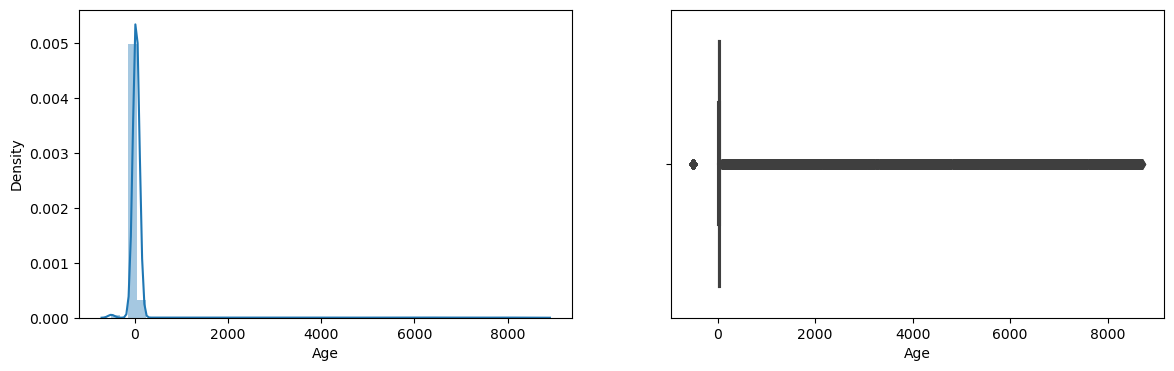

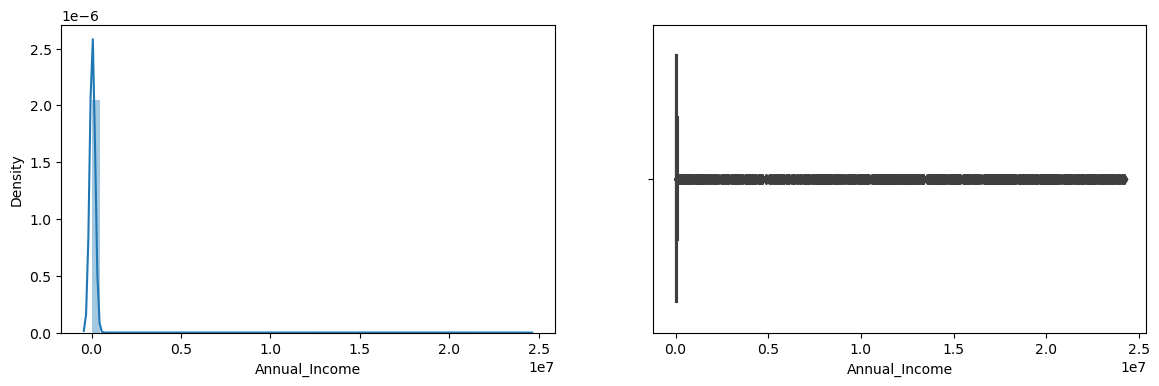

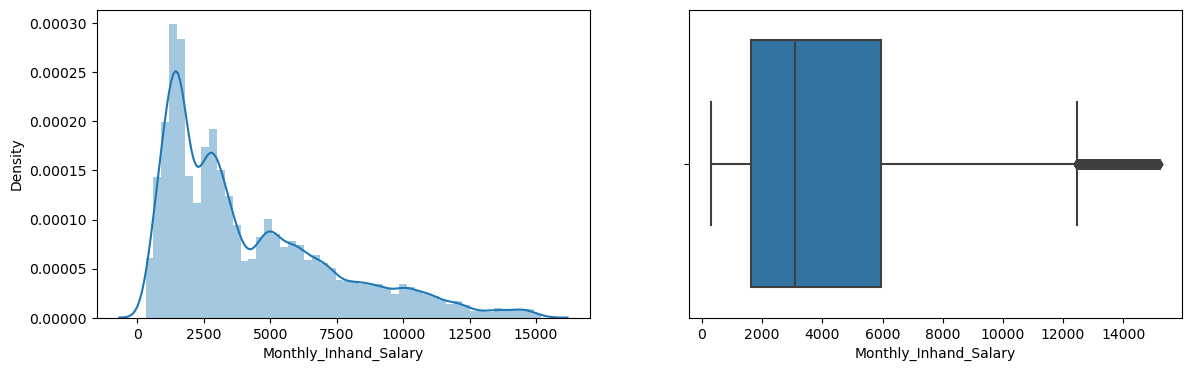

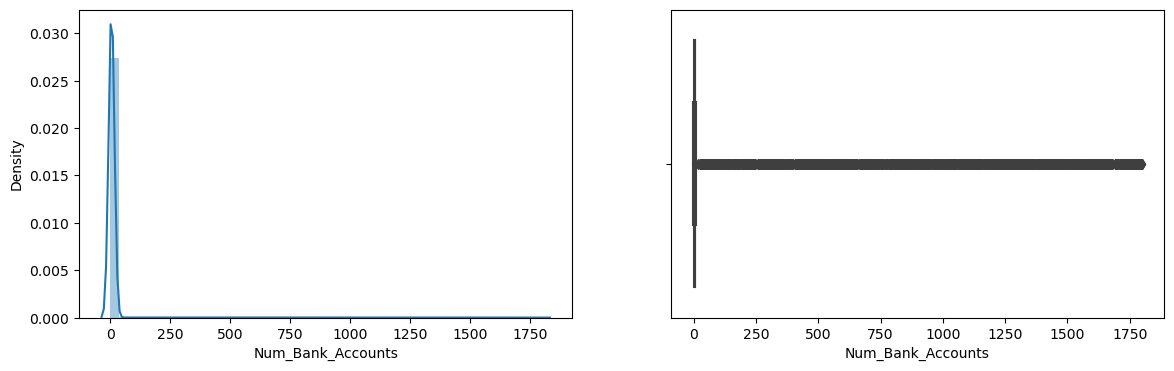

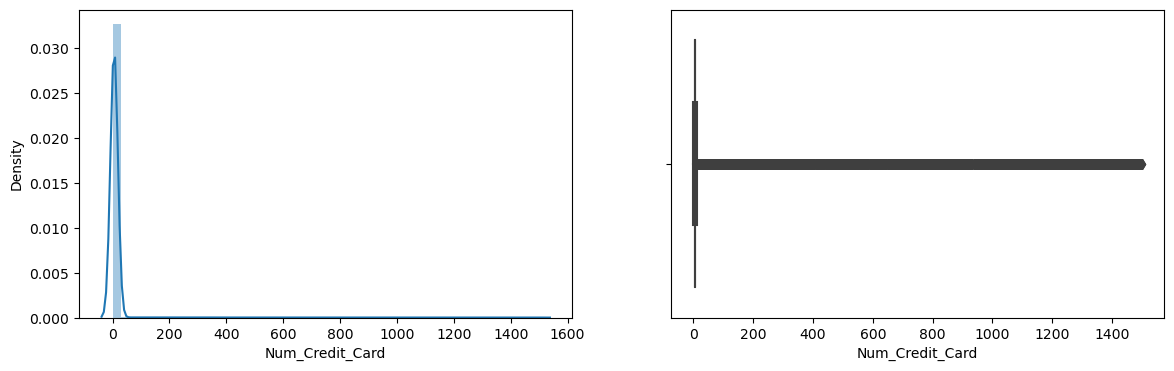

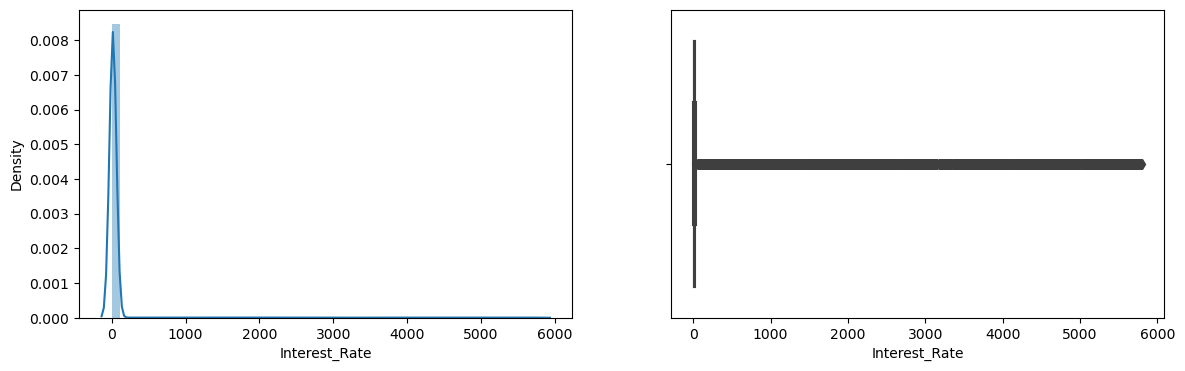

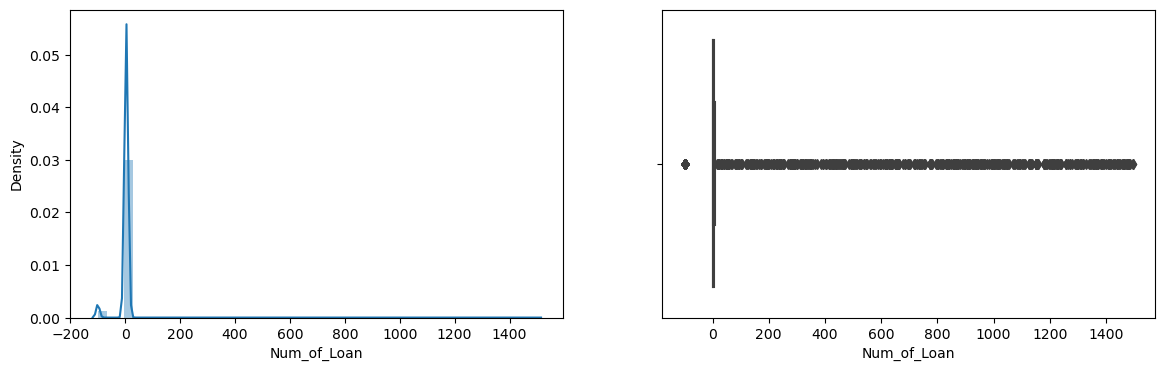

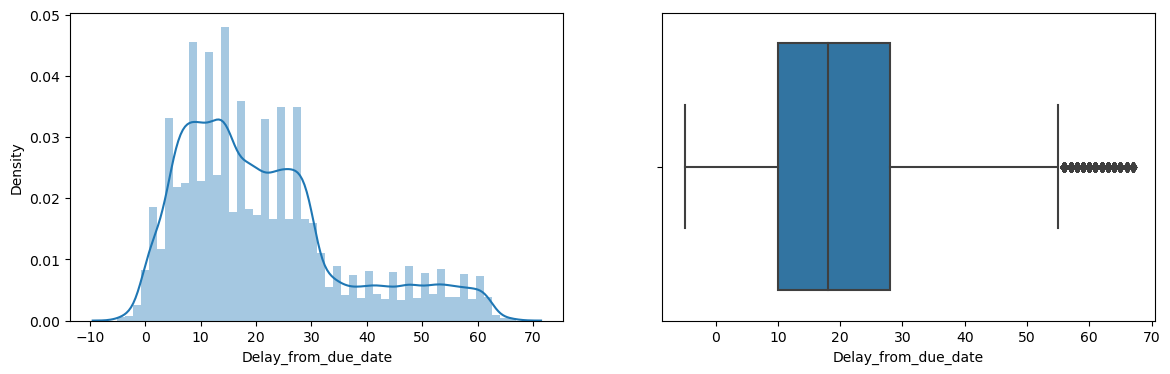

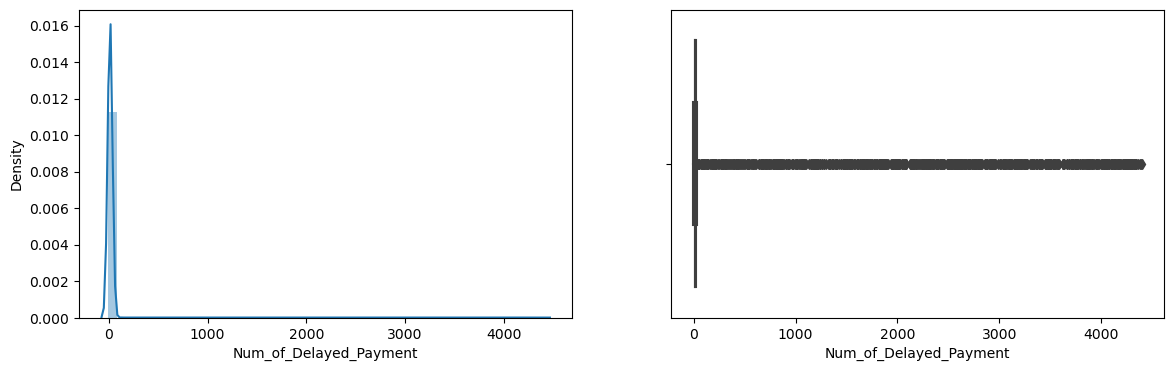

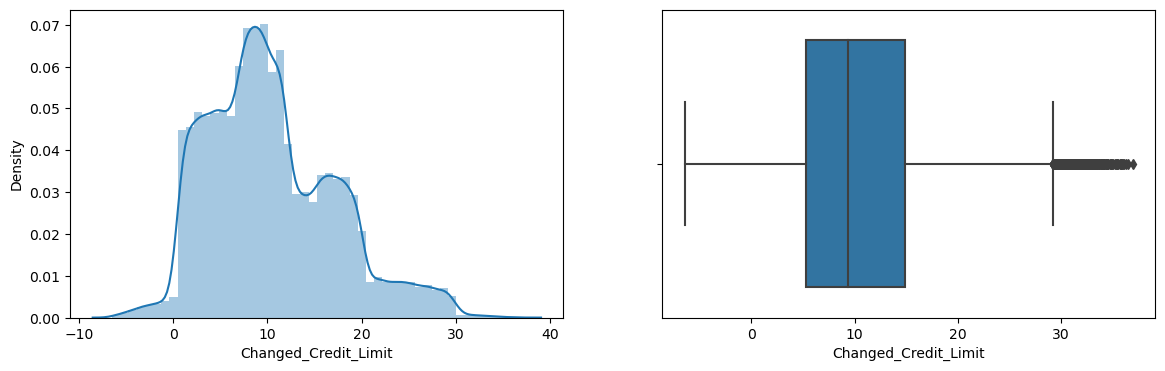

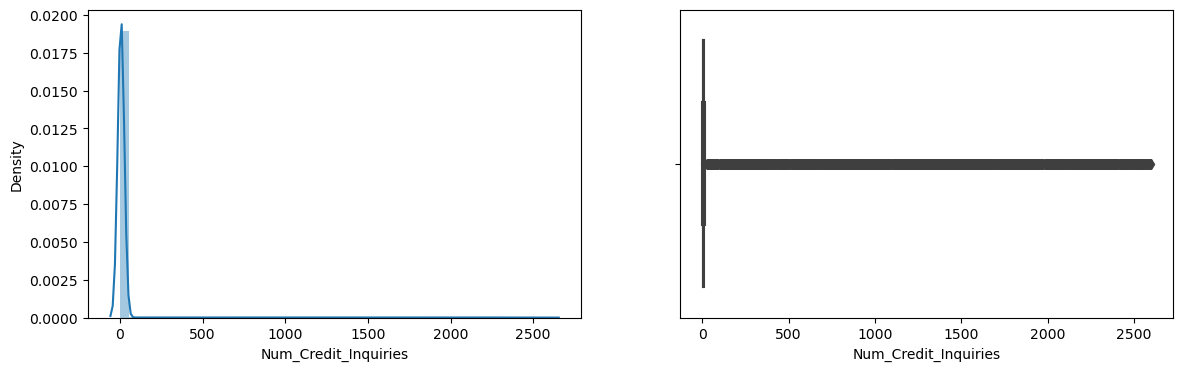

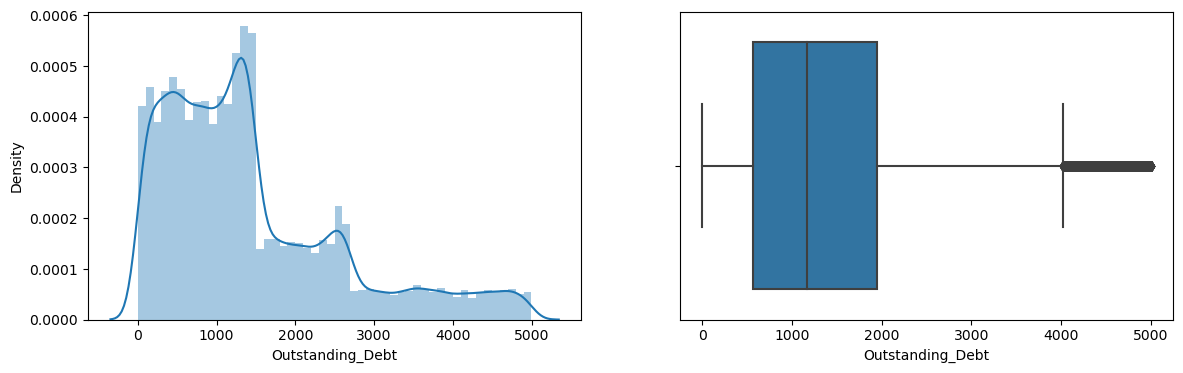

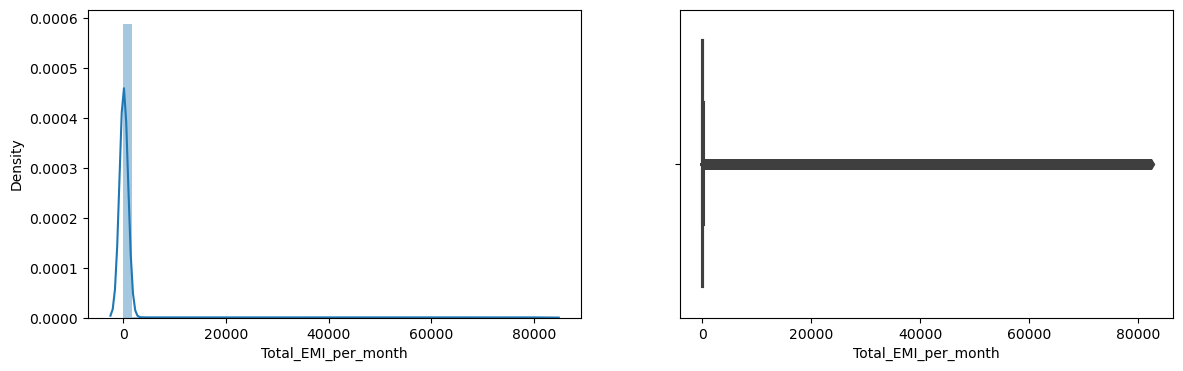

In [13]:
li = df.select_dtypes(include=(int,float)).columns

for col in li:
    
    fig, axes = plt.subplots(1,2, figsize = (14, 4))
    
    plt.subplot(121)
    sns.distplot(df[col])
    
    plt.subplot(122)
    sns.boxplot(x=df[col])

### interpretation:

During the observation of a numerical dataset, it has been identified that there are outliers present in 13 columns. Outliers are data points that deviate significantly from the rest of the dataset and can impact statistical analysis and modeling results. To address this issue, it is necessary to treat the outliers using the IQR (Interquartile Range) method.

### Outliers Treatment

#### Age Column

In [14]:
df["Age"].unique()

array([  23., -500.,   nan, ..., 6476., 2263., 1342.])

In [15]:
df.loc[df['Age'] == 33.98946992, 'Age'] = 33

Q1 = df["Age"].quantile(0.25)
Q3 = df["Age"].quantile(0.75)

IQR = Q3 - Q1

upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR

print("Upper Limit is:", upper_limit)
print("Lower Limit is:", lower_limit)

Upper Limit is: 69.0
Lower Limit is: -3.0


In [16]:
df[(df["Age"]> 0) & (df["Age"] <18)].shape

(5433, 20)

### Interpretation:

Based on the given information, it is indicated that the analysis is being performed on a credit report dataset. It is stated that it is not possible for individuals below the age of 18 to have a credit score. Therefore, to ensure the accuracy and reliability of the analysis, the lower limit for age is adjusted to 18.

This adjustment makes sense because in many jurisdictions, individuals under the age of 18 are considered minors and typically do not have the legal capacity to enter into credit agreements or have credit scores. By setting the lower limit for age at 18, the analysis focuses on individuals who are eligible and likely to have credit scores, aligning with the typical age requirement for credit-related activities.

In [17]:
df.loc[df["Age"] < 18, "Age"] = 18

df["Age"] = np.where(
    
    df["Age"]>upper_limit,
    upper_limit,

    np.where(
        
        df["Age"]<lower_limit,
        18,
        
        df["Age"]
    )
)

#### Annual_Income

In [18]:
Q1 = df["Annual_Income"].quantile(0.25)
Q3 = df["Annual_Income"].quantile(0.75)

IQR = Q3 - Q1

upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR

print("Upper Limit is:", upper_limit)
print("Lower Limit is:", lower_limit)

Upper Limit is: 152955.05000000002
Lower Limit is: -60676.070000000014


In [19]:
df["Annual_Income"] = np.where(
    
    df["Annual_Income"]>upper_limit,
    upper_limit,

    df["Annual_Income"]
    
)

#### Num_Bank_Accounts Column 

In [20]:
Q1 = df["Num_Bank_Accounts"].quantile(0.25)
Q3 = df["Num_Bank_Accounts"].quantile(0.75)

IQR = Q3 - Q1

upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR

print("Upper Limit is:", upper_limit)
print("Lower Limit is:", lower_limit)

Upper Limit is: 13.0
Lower Limit is: -3.0


### Interpretation:

1. Based on the given information that there are 1000 bank accounts, it is stated that this may be a misprint in the data. It is highly unusual for an individual or entity to have such a large number of bank accounts. Therefore, it is reasonable to suspect an error or misrepresentation in the data. To address this anomaly, it is suggested to employ upper and lower limits using the Interquartile Range (IQR) method. 

In [21]:
df["Num_Bank_Accounts"] = np.where(
    
    df["Num_Bank_Accounts"]>upper_limit,
    upper_limit,

    np.where(
        
        df["Num_Bank_Accounts"]<0,
        1,
        
        df["Num_Bank_Accounts"]
    )
)

#### Monthly Inhand Salary

In [22]:
Q1 = df["Monthly_Inhand_Salary"].quantile(0.25)
Q3 = df["Monthly_Inhand_Salary"].quantile(0.75)

IQR = Q3 - Q1

upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR

print("Upper Limit is:", upper_limit)
print("Lower Limit is:", lower_limit)

Upper Limit is: 12455.268489583334
Lower Limit is: -4872.251927083333


In [23]:
df["Monthly_Inhand_Salary"] = np.where(
    
    df["Monthly_Inhand_Salary"]>upper_limit,
    upper_limit,
    
    df["Monthly_Inhand_Salary"]
)

#### Num_Credit_Card Column

In [24]:
Q1 = df["Num_Credit_Card"].quantile(0.25)
Q3 = df["Num_Credit_Card"].quantile(0.75)

IQR = Q3 - Q1

upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR

print("Upper Limit is:", upper_limit)
print("Lower Limit is:", lower_limit)

Upper Limit is: 11.5
Lower Limit is: -0.5


### Interpretation:

1. Based on the provided information stating that there are 500 credit cards, it seems highly unlikely for an individual to possess such a large number of credit cards. This suggests the possibility of a misprint or error in the data. To address this potential anomaly, it is advisable to apply upper and lower limits using the Interquartile Range (IQR) method. 

In [25]:
df["Num_Credit_Card"] = np.where(
    
    df["Num_Credit_Card"]>upper_limit,
    12,

    np.where(
        
        df["Num_Credit_Card"]<0,
        0,
        
        df["Num_Credit_Card"]
    )
)

#### Interest Rate Column

In [26]:
Q1 = df["Interest_Rate"].quantile(0.25)
Q3 = df["Interest_Rate"].quantile(0.75)

IQR = Q3 - Q1

upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR

print("Upper Limit is:", upper_limit)
print("Lower Limit is:", lower_limit)

Upper Limit is: 38.0
Lower Limit is: -10.0


### Interpretation:

1. Interest rates can vary significantly between different banks and countries. While it is uncommon to find personal loan or credit card interest rates as high as 38% in many developed countries, such rates may be available in certain circumstances or regions with less regulated financial systems or in countries with higher levels of risk.

In [27]:
df["Interest_Rate"] = np.where(
    
    df["Interest_Rate"]>upper_limit,
    upper_limit,

    np.where(
        
        df["Interest_Rate"]<=0,
        1,
        
        df["Interest_Rate"]
    )
)

#### Num_of_Loan Column

In [28]:
Q1 = df["Num_of_Loan"].quantile(0.25)
Q3 = df["Num_of_Loan"].quantile(0.75)

IQR = Q3 - Q1

upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR

print("Upper Limit is:", upper_limit)
print("Lower Limit is:", lower_limit)

Upper Limit is: 11.0
Lower Limit is: -5.0


### Interpretation:

1. The unusually high values may be a result of misprints or errors during data entry or data processing. These values may not accurately represent the intended information and can significantly impact the analysis or interpretation. To address this, it is essential to investigate and validate the accuracy of these values

In [29]:
df["Num_of_Loan"] = np.where(
    
    df["Num_of_Loan"]>upper_limit,
    upper_limit,

    np.where(
        
        df["Num_of_Loan"]<0,
        0,
        
        df["Num_of_Loan"]
    )
)

#### Num_Credit_Inquiries Column

In [30]:
Q1 = df["Num_Credit_Inquiries"].quantile(0.25)
Q3 = df["Num_Credit_Inquiries"].quantile(0.75)

IQR = Q3 - Q1

upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR

print("Upper Limit is:", upper_limit)
print("Lower Limit is:", lower_limit)

Upper Limit is: 18.0
Lower Limit is: -6.0


### Interpretation:

In this case, it appears that the number of credit inquiries by an individual in the dataset is showing values greater than 1000, which is considered impractical. Additionally, the upper quartile range is 18, indicating that the majority of the data falls below this value. Given this information, it can be concluded that the values greater than 18 are likely misrepresentations in the dataset and should be treated accordingly. 

In [31]:
df["Num_Credit_Inquiries"] = np.where(
    
    df["Num_Credit_Inquiries"]>upper_limit,
    upper_limit,

    np.where(
        
        df["Num_Credit_Inquiries"]<0,
        0,
        
        df["Num_Credit_Inquiries"]
    )
)

#### Delay from Due Date

In [32]:
Q1 = df["Delay_from_due_date"].quantile(0.25)
Q3 = df["Delay_from_due_date"].quantile(0.75)

IQR = Q3 - Q1

upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR

print("Upper Limit is:", upper_limit)
print("Lower Limit is:", lower_limit)

Upper Limit is: 55.0
Lower Limit is: -17.0


### Interpretation:

In [33]:
df["Delay_from_due_date"] = np.where(
    
    df["Delay_from_due_date"]>upper_limit,
    upper_limit,

    np.where(
        
        df["Delay_from_due_date"]<0,
        0,
        
        df["Delay_from_due_date"]
    )
)

#### Num of delayed Payment

In [34]:
Q1 = df["Num_of_Delayed_Payment"].quantile(0.25)
Q3 = df["Num_of_Delayed_Payment"].quantile(0.75)

IQR = Q3 - Q1

upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR

print("Upper Limit is:", upper_limit)
print("Lower Limit is:", lower_limit)

Upper Limit is: 31.5
Lower Limit is: -4.5


In [35]:
df["Num_of_Delayed_Payment"] = np.where(
    
    df["Num_of_Delayed_Payment"]>upper_limit,
    upper_limit,

    np.where(
        
        df["Num_of_Delayed_Payment"]<0,
        0,
        
        df["Num_of_Delayed_Payment"]
    )
)

#### Change Credit Limit

In [36]:
Q1 = df["Changed_Credit_Limit"].quantile(0.25)
Q3 = df["Changed_Credit_Limit"].quantile(0.75)

IQR = Q3 - Q1

upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR

print("Upper Limit is:", upper_limit)
print("Lower Limit is:", lower_limit)

Upper Limit is: 29.195
Lower Limit is: -9.004999999999999


In [37]:
df["Changed_Credit_Limit"] = np.where(
    
    df["Changed_Credit_Limit"]>upper_limit,
    upper_limit,

    np.where(
        
        df["Changed_Credit_Limit"]<0,
        0,
        
        df["Changed_Credit_Limit"]
    )
)

#### Outstanding Debt Column

In [38]:
Q1 = df["Outstanding_Debt"].quantile(0.25)
Q3 = df["Outstanding_Debt"].quantile(0.75)

IQR = Q3 - Q1

upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR

print("Upper Limit is:", upper_limit)
print("Lower Limit is:", lower_limit)

Upper Limit is: 4021.38
Lower Limit is: -1507.1


In [39]:
df["Outstanding_Debt"] = np.where(
    
    df["Outstanding_Debt"]>upper_limit,
    upper_limit,

    np.where(
        
        df["Outstanding_Debt"]<0,
        0,
        
        df["Outstanding_Debt"]
    )
)

#### Total EMI Per Month

In [40]:
Q1 = df["Total_EMI_per_month"].quantile(0.25)
Q3 = df["Total_EMI_per_month"].quantile(0.75)

IQR = Q3 - Q1

upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR

print("Upper Limit is:", upper_limit)
print("Lower Limit is:", lower_limit)

Upper Limit is: 357.60063203221614
Lower Limit is: -166.06972242783047


In [41]:
df["Total_EMI_per_month"].min()

0.0

In [42]:
df["Total_EMI_per_month"] = np.where(
    
    df["Total_EMI_per_month"]>upper_limit,
    upper_limit,

    np.where(
        
        df["Total_EMI_per_month"]<0,
        0,
        
        df["Total_EMI_per_month"]
    )
)

In [43]:
df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Total_EMI_per_month
count,95061.000000,93020.000000,84998.000000,100000.00000,100000.00000,100000.000000,95215.000000,100000.000000,90254.000000,97909.000000,98035.000000,98991.000000,100000.000000
mean,33.989470,51250.643005,4167.185807,5.46841,5.68018,15.008950,3.425353,20.909770,13.475608,10.417679,5.986770,1400.429230,108.054040
std,11.577356,38694.772663,3105.074259,2.71862,2.25974,9.263065,2.544900,14.406884,6.464739,6.691119,4.138214,1086.800228,104.531770
min,18.000000,7005.930000,303.645417,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230000,0.000000
25%,24.000000,19435.600000,1625.568229,3.00000,4.00000,8.000000,1.000000,10.000000,9.000000,5.320000,3.000000,566.080000,30.306660
50%,33.000000,37550.740000,3093.745000,6.00000,5.00000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,1166.370000,69.249473
75%,42.000000,72843.380000,5957.448333,7.00000,7.00000,20.000000,5.000000,28.000000,18.000000,14.870000,9.000000,1948.200000,161.224249
max,69.000000,152955.050000,12455.268490,13.00000,12.00000,38.000000,11.000000,55.000000,31.500000,29.195000,18.000000,4021.380000,357.600632


### Interpretation:

After treating outliers, the mean of all columns becoming equal to or near to the new standard deviation, suggests a significant shift in the central tendency. This indicates that the outlier treatment resulted in a more balanced distribution. The reduced standard deviation implies a narrower spread and less variability, indicating a more concentrated distribution around the mean.

### Null Values Treatment On Numerical Columns

In [44]:
si = SimpleImputer(strategy='mean')

columns_to_impute = ["Age", "Annual_Income", "Monthly_Inhand_Salary", "Num_of_Loan", "Num_of_Delayed_Payment", 
                     "Changed_Credit_Limit", "Num_Credit_Inquiries", "Outstanding_Debt"]
df[columns_to_impute] = si.fit_transform(df[columns_to_impute])

### Visual Representation of Spread of Numerical Data

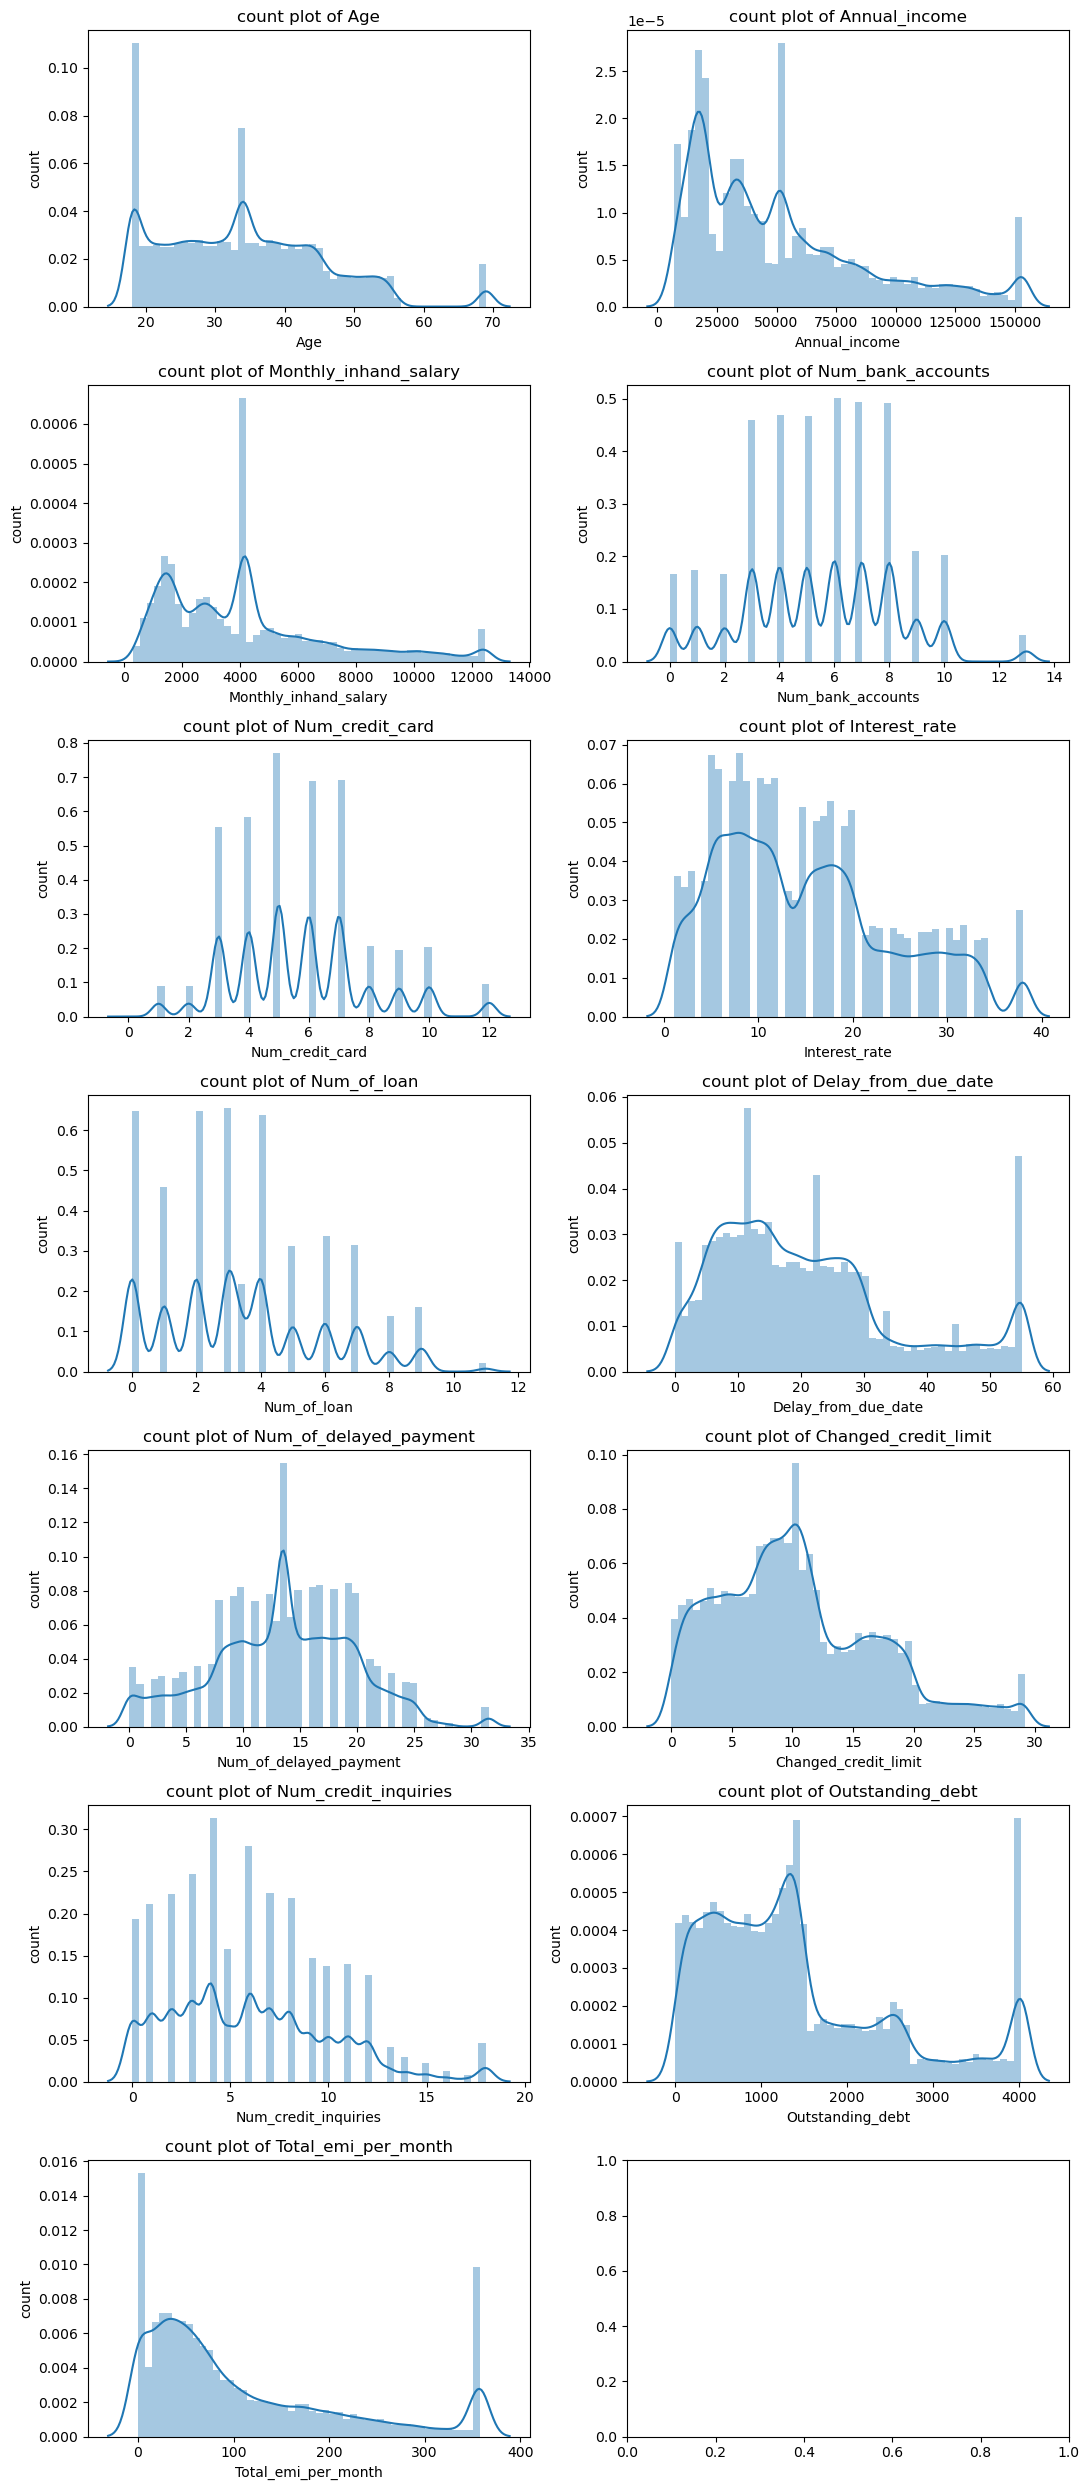

In [45]:
li = df.select_dtypes(include=(int,float)).columns

fig, axes = plt.subplots(7, 2, figsize = (11, 25))

axes = axes.flatten()

for i, col in enumerate(li):
    
    sns.distplot(df[col], ax=axes[i])
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel("count")
    axes[i].set_title(f"count plot of {col.capitalize()}")

plt.tight_layout()
plt.show()

### Interpretation:

After evaluating the columns "Num_Bank_Account," "Num_Credit_Card," "Num_of_Loan," "Num_of_delayed_payment," "Interest_Rate," and "Num_credit_inquiries," it is observed that the values in these columns represent numeric counts. Although they may appear to be categorical, it is more appropriate to treat these columns as numeric data types.
Treating these columns as numeric allows for quantitative analysis and statistical calculations that are well-suited for count variables. 

### Checking Correlation of Independant Columns

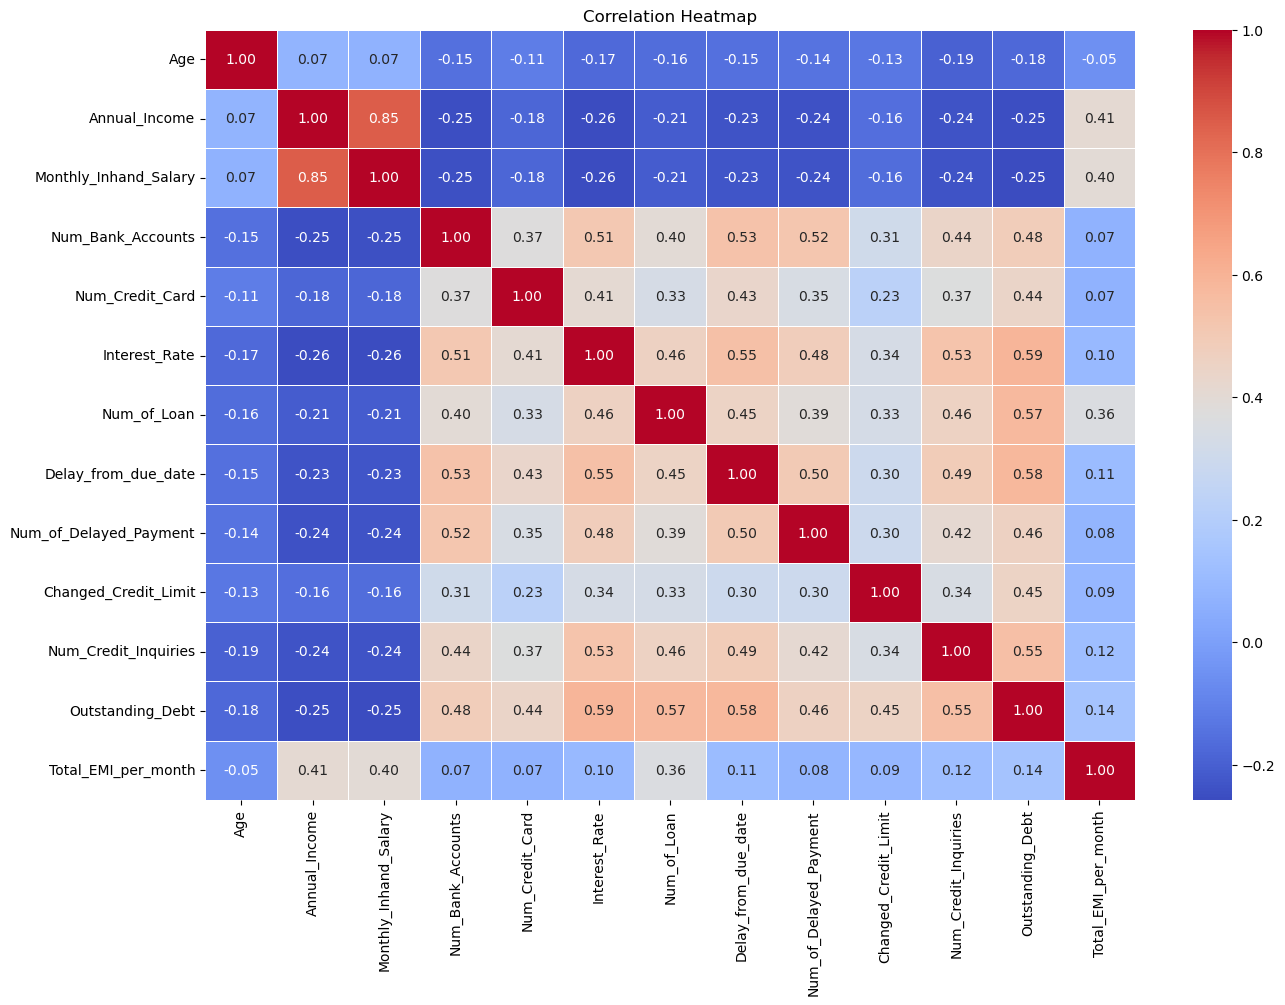

In [46]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, ax=ax)
plt.title("Correlation Heatmap")
plt.show()

### Interpretation:

Upon analyzing the correlation between monthly inhand salary and annual income, it has been observed that these two variables are highly positively correlated with a correlation coefficient of 85%. This high positive correlation indicates that as the monthly inhand salary increases, the annual income also tends to increase proportionally.
Furthermore, it has been determined that the monthly inhand salary has a weaker relationship with the dependent variable compared to other variables in the dataset. Based on these findings, it is reasonable to consider removing the monthly inhand salary column from the dataset.

In [47]:
df = df.drop(["Monthly_Inhand_Salary"], axis=1)

### Checking Multicollinearity Using VIF Model

In [48]:
num_col = ['Age', 'Annual_Income', 'Num_Bank_Accounts','Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
           'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Total_EMI_per_month']

predictors = df[num_col]
predictors = sm.add_constant(predictors)

vif_data = pd.DataFrame()
vif_data['Variable'] = predictors.columns

vif_data['VIF'] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]
print(vif_data)

                  Variable        VIF
0                    const  28.934854
1                      Age   1.055204
2            Annual_Income   1.538232
3        Num_Bank_Accounts   1.742740
4          Num_Credit_Card   1.373366
5            Interest_Rate   1.957383
6              Num_of_Loan   1.961955
7      Delay_from_due_date   1.947736
8   Num_of_Delayed_Payment   1.627976
9     Changed_Credit_Limit   1.301823
10    Num_Credit_Inquiries   1.727140
11        Outstanding_Debt   2.344999
12     Total_EMI_per_month   1.605200


### interpretation:

The predictor variable Outstanding_Debt has a VIF greater than 2, it suggests that at least 80% of its variance can be explained by other predictor variables in the model. Hence it is perefer to delete this column. 

In [49]:
df = df.drop(["Outstanding_Debt"], axis=1)

### Plotting countplot for visualizing the count or frequency of occurrences of categorical variables.

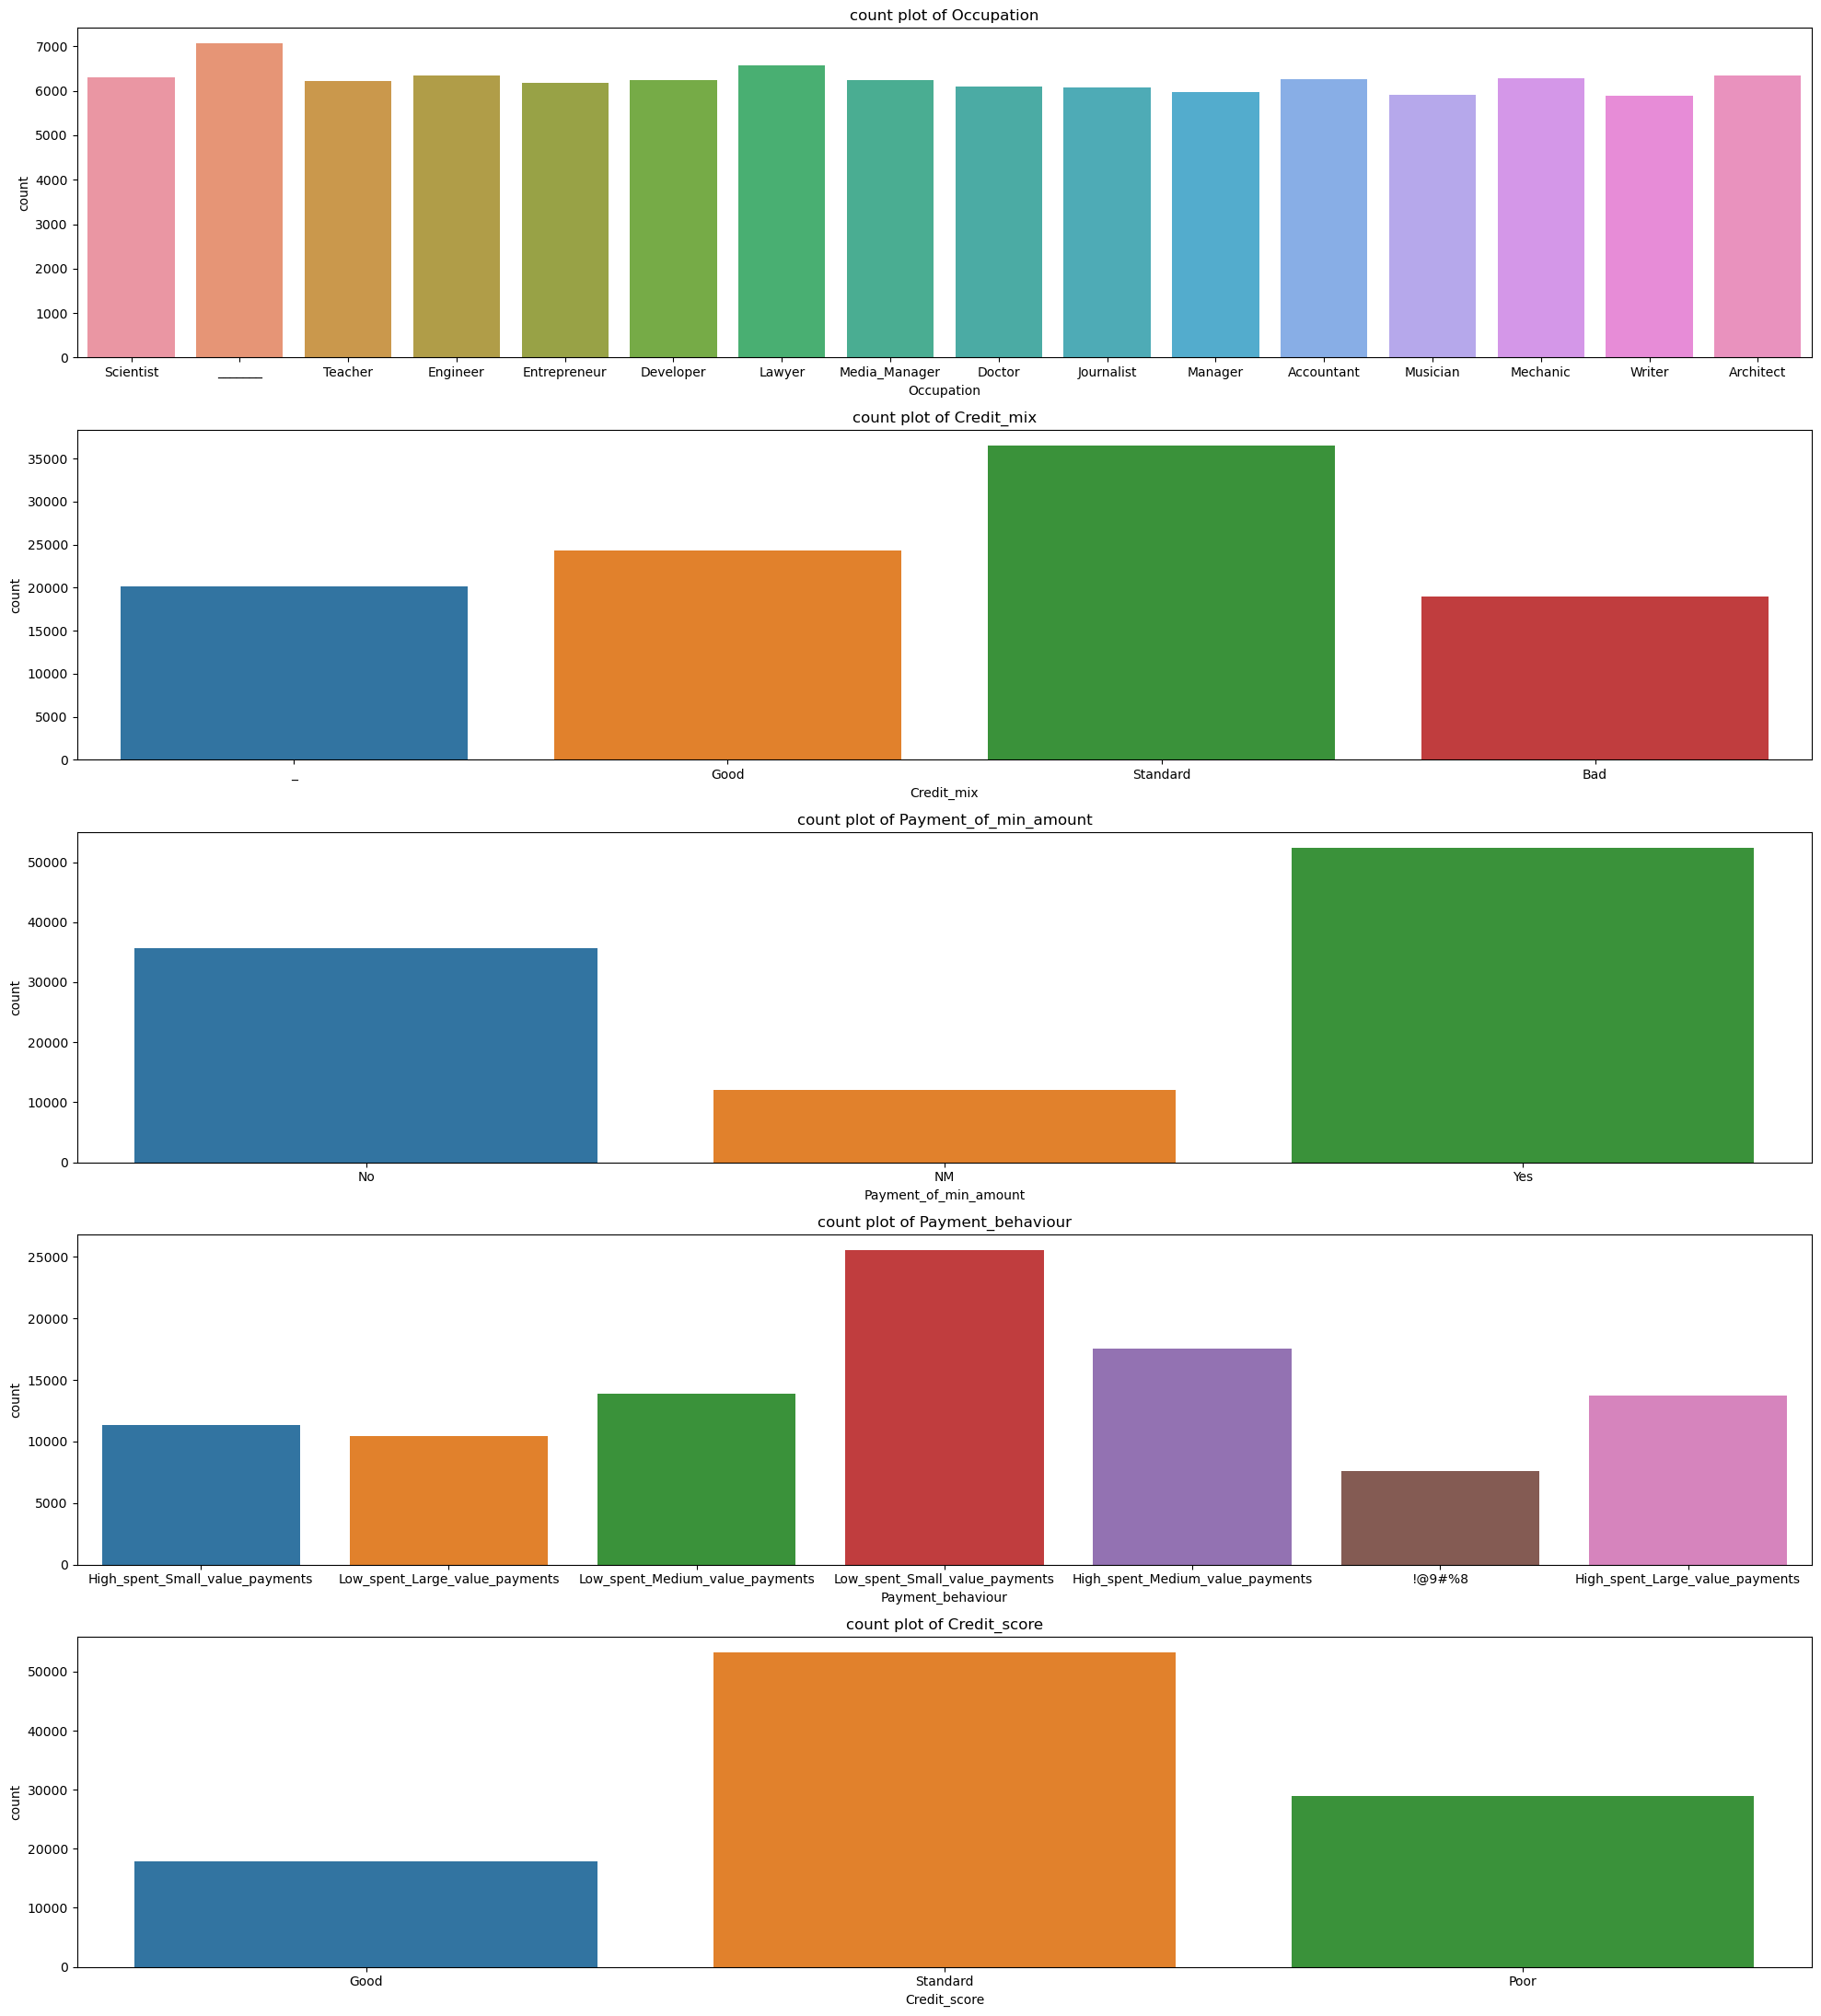

In [50]:
category = ["Occupation", "Credit_Mix", "Payment_of_Min_Amount", "Payment_Behaviour", "Credit_Score"]

fig, axes = plt.subplots(5, 1, figsize = (20, 22))

axes = axes.flatten()

for i, col in enumerate(category):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel("count")
    axes[i].set_title(f"count plot of {col.capitalize()}")

plt.tight_layout()
plt.show()

### Interpretation:

1. Certain categorical columns contain symbols that cannot be treated or replaced with the mode due to their high volume in the data, it is important to carefully consider the impact of these symbols on the analysis and interpretation. Replacing symbols with the mode value may not be appropriate in this case, as it can potentially misrepresent the data and lead to incorrect conclusions. The large volume of symbols suggests that they are not outliers but rather a significant category or group within the dataset. To handle this situation, Instead of replacing the symbols, we can analyze and interpret the data separately for each category, including the symbols. This approach enables a more comprehensive understanding of the dataset, considering the unique characteristics and patterns associated with the symbols.
2. "Type of loan" has a large number of unique values, using one-hot encoding directly can lead to a high number of new columns and introduce the problem of high dimensionality. To address this issue, we can consider alternative encoding techniques "Target Encoding".

In [51]:
df["Occupation"] = df["Occupation"].replace("_______", np.nan)
df["Occupation"] = df["Occupation"].fillna(np.random.choice(pd.Series(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'])))

In [52]:
df["Payment_Behaviour"] = df["Payment_Behaviour"].replace("!@9#%8", np.nan)
df["Payment_Behaviour"] = df["Payment_Behaviour"].fillna(np.random.choice(pd.Series(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments', 'Low_spent_Medium_value_payments', 'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', 'High_spent_Large_value_payments'])))

In [53]:
df["Credit_Mix"] = df["Credit_Mix"].replace("_", np.nan)
df["Credit_Mix"] = df["Credit_Mix"].fillna(np.random.choice(pd.Series(['Good', 'Standard', 'Bad'])))

In [54]:
df["Payment_of_Min_Amount"] = df["Payment_of_Min_Amount"].replace("NM", np.nan)
df["Payment_of_Min_Amount"] = df["Payment_of_Min_Amount"].fillna(np.random.choice(pd.Series(['No', 'Yes'])))

### Null Values Treatment of Categorical Variables

In [55]:
si = SimpleImputer(strategy='most_frequent')

columns_to_impute = ["Type_of_Loan", "Credit_History_Age"]
df[columns_to_impute] = si.fit_transform(df[columns_to_impute])

### Target Encoding 

In [56]:
score_mapping = {'Good': 0, 'Poor': 1, 'Standard': 2}
df['Credit_Score'] = df['Credit_Score'].map(score_mapping)

df['type_of_loan_encoded'] = df.groupby('Type_of_Loan')['Credit_Score'].transform('mean')
df.drop(['Type_of_Loan'], axis=1, inplace=True)

### Binning 

By applying binning techniques on the age and annual income columns, we have categorized the data into specific ranges or bins. Binning is a data preprocessing method that discretizes continuous variables into discrete groups or intervals, allowing for easier analysis and interpretation.

In [57]:
kbin = KBinsDiscretizer(n_bins = 3, encode = 'ordinal', strategy = 'kmeans')
col_to_bin = ["Age"]
df[col_to_bin] = kbin.fit_transform(df[col_to_bin])

In [58]:
kbin = KBinsDiscretizer(n_bins = 16, encode = 'ordinal', strategy = 'kmeans')
col_to_bin = ["Annual_Income"]
df[col_to_bin] = kbin.fit_transform(df[col_to_bin])

### Power Transform 

When observing the data in the dataset, it has been determined that the distribution of the variables is not normal. In order to address this, we apply a power transformation using the Yeo-Johnson technique to normalize the data.

In [59]:
columns_to_transform = ["Delay_from_due_date", "Changed_Credit_Limit", "Total_EMI_per_month"]
trf = PowerTransformer(method='yeo-johnson')
df[columns_to_transform] = trf.fit_transform(df[columns_to_transform])

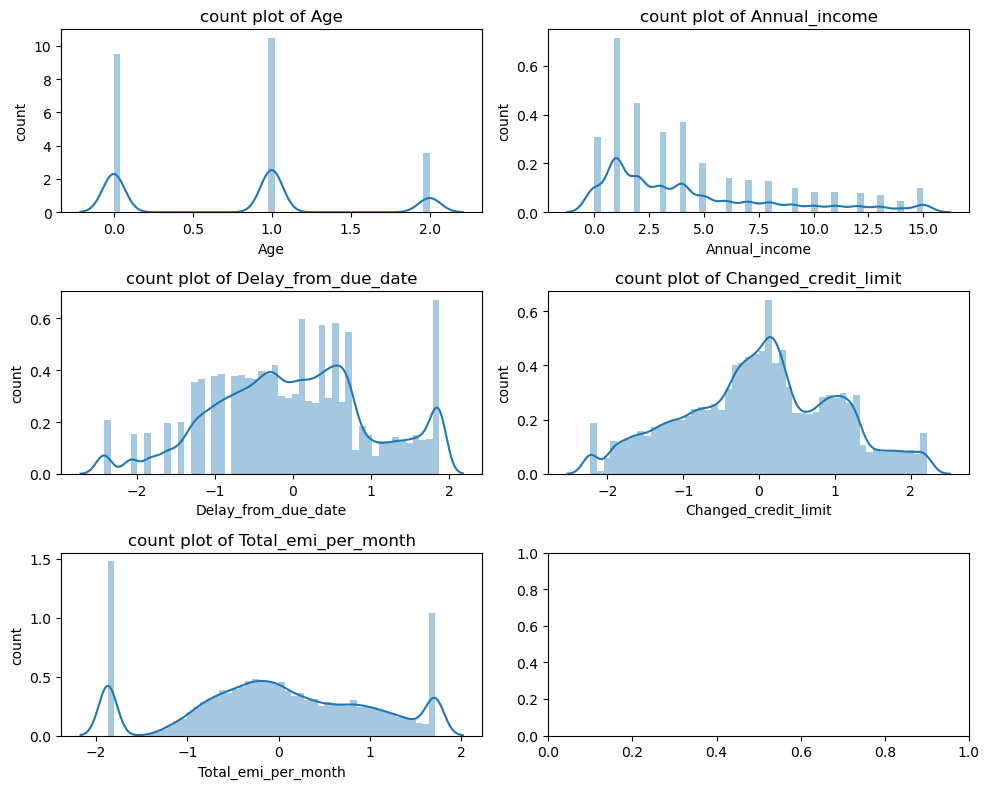

In [60]:
columns_to_transform = ["Age", "Annual_Income", "Delay_from_due_date", "Changed_Credit_Limit", "Total_EMI_per_month"]

fig, axes = plt.subplots(3, 2, figsize = (10,8))

axes = axes.flatten()

for i, col in enumerate(columns_to_transform):
    
    sns.distplot(df[col], ax=axes[i])
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel("count")
    axes[i].set_title(f"count plot of {col.capitalize()}")

plt.tight_layout()
plt.show()

### Encoding and Scalling

In [61]:
X = df.drop(["Credit_Score"], axis=1)
y = df["Credit_Score"]

In [62]:
def convert_to_months(age):
    years, months = age.split(" Years and ")
    months = months.split(" Months")[0]
    total_months = int(years) * 12 + int(months)
    return total_months

X["History_Credit_Age"] = X["Credit_History_Age"].apply(convert_to_months)

X = X.drop(["Credit_History_Age"], axis=1)

X["History_Credit_Age"]=X["History_Credit_Age"].astype('object')

In [63]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Age                     100000 non-null  float64
 1   Occupation              100000 non-null  object 
 2   Annual_Income           100000 non-null  float64
 3   Num_Bank_Accounts       100000 non-null  float64
 4   Num_Credit_Card         100000 non-null  int64  
 5   Interest_Rate           100000 non-null  float64
 6   Num_of_Loan             100000 non-null  float64
 7   Delay_from_due_date     100000 non-null  float64
 8   Num_of_Delayed_Payment  100000 non-null  float64
 9   Changed_Credit_Limit    100000 non-null  float64
 10  Num_Credit_Inquiries    100000 non-null  float64
 11  Credit_Mix              100000 non-null  object 
 12  Payment_of_Min_Amount   100000 non-null  object 
 13  Total_EMI_per_month     100000 non-null  float64
 14  Payment_Behaviour    

### Interpretation:
1. Columns 0,2,3,4,5,6,7,8,9,10,13,15 : These columns are numerical in nature. However, due to the difference in value ranges between them, it is recommended to apply standard scaling to normalize the values.
2. Columns 1,12 : These columns are categorical in nature and have nominal data. Since they represent distinct categories without any inherent order or ranking, it is appropriate to use one-hot encoding for these columns.
3. Columns 11,14,16: These columns are also categorical but have ordinal data. Ordinal data represents categories with a specific order or ranking. In this case, it is recommended to use ordinal encoding.

In [64]:
trf1 = ColumnTransformer([
    ('OHE', OneHotEncoder(sparse=False, handle_unknown='ignore', drop = 'first'), [1,12]),
    ('OE', OrdinalEncoder(), [11,14,16]),
    ('StandardScaler', StandardScaler(), [0,2,3,4,5,6,7,8,9,10,13,15])
], remainder='passthrough')

In [65]:
df_transformed = trf1.fit_transform(X)

### Split data into training and testing data

In [66]:
X_train, X_test, y_train, y_test = train_test_split(df_transformed, y, test_size=0.3, random_state=10)

### Model Fitting 

### 1. Decision Tree 

In [74]:
classifier = DecisionTreeClassifier(max_depth = 15)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=15)

In [75]:
y_pred = classifier.predict(X_test)
y_pred

array([2, 2, 1, ..., 2, 2, 2], dtype=int64)

### Confusion Matrix of Decision Tree Model

In [76]:
pd.DataFrame(confusion_matrix(y_test,y_pred), columns = list(range(0,3)))

,0,1,2
0,3686,158,1408
1,480,6671,1620
2,1859,1973,12145


### Interpretation:

1. True Positives (TP):

Class "good" (0): The model correctly predicted 3,686 instances as "good" (class 0). Class "bad" (1): The model correctly predicted 6,671 instances as "bad" (class 1). Class "average" (2): The model correctly predicted 12,145 instances as "average" (class 2).

### Accuracy Report 

In [77]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.70      0.65      5252
           1       0.76      0.76      0.76      8771
           2       0.80      0.76      0.78     15977

    accuracy                           0.75     30000
   macro avg       0.72      0.74      0.73     30000
weighted avg       0.75      0.75      0.75     30000



### Interpretation:

1. Accuracy: 0.75 is the overall accuracy of the model, which measures the percentage of correct predictions across all classes.
2. Macro Average: 0.72 precision, 0.74 recall, and 0.73 F1-score represent the unweighted average of the metrics for all classes.
3. Weighted Average: 0.75 precision, 0.75 recall, and 0.75 F1-score are the weighted average of the metrics, considering the support for each class.

In conclusion, the model shows reasonably good performance, but there might be some imbalance in the classes, as indicated by the differences in precision and recall across classes. Further analysis and potentially balancing the data might be necessary to improve the model's performance.

### Cross Validation 

In [78]:
from sklearn.model_selection import cross_val_score

cross_val_score(classifier,df_transformed, y, cv=5)

array([0.70125, 0.70385, 0.71815, 0.70605, 0.7113 ])

### Hyperparameter Tunning 

In [79]:
hyperparameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(1, 15),
    'min_samples_split': np.arange(2, 15),
    'min_samples_leaf': np.arange(1, 15)
}

In [80]:
grid_search = GridSearchCV(classifier, hyperparameters, cv=5, verbose =2, n_jobs = -1)

In [81]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 5096 candidates, totalling 25480 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=15), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             verbose=2)

In [82]:
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 14, 'min_samples_split': 6}


In [83]:
best_dt_classifier = grid_search.best_estimator_

In [84]:
y_pred = best_dt_classifier.predict(X_test)

In [85]:
y_pred

array([0, 2, 1, ..., 2, 2, 0], dtype=int64)

In [86]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.71      0.65      5252
           1       0.76      0.75      0.76      8771
           2       0.80      0.76      0.78     15977

    accuracy                           0.75     30000
   macro avg       0.72      0.74      0.73     30000
weighted avg       0.76      0.75      0.75     30000



### Interpretation:

After performing hyperparameter tuning for the same model, the performance metrics have slightly improved compared to the previous results. 
1. Accuracy: 0.75 is the overall accuracy of the model, which measures the percentage of correct predictions across all classes.
2. Macro Average: 0.72 precision, 0.74 recall, and 0.73 F1-score represent the unweighted average of the metrics for all classes.
3. Weighted Average: 0.76 precision, 0.75 recall, and 0.75 F1-score are the weighted average of the metrics, considering the support for each class.

Overall, hyperparameter tuning has helped to optimize the model and achieve better performance, but there is still room for improvement, especially for Class 0 predictions. 

### 2. Logistic Regression

In [87]:
log = LogisticRegression(max_iter=1000, multi_class='multinomial')
log.fit(X_train,y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [88]:
y_pred_L= log.predict(X_test)
y_pred_L

array([0, 2, 1, ..., 2, 2, 2], dtype=int64)

### Confusion Matix of Logistic Regression

In [89]:
pd.DataFrame(confusion_matrix(y_test,y_pred_L), columns = list(range(0,3)))

,0,1,2
0,2866,248,2138
1,439,5529,2803
2,1337,1564,13076


### Interpretation:

1. True Positives (TP):

Class "good" (0): The model correctly predicted 2,866 instances as "good" (class 0). Class "bad" (1): The model correctly predicted 5,529 instances as "bad" (class 1). Class "average" (2): The model correctly predicted 13,076 instances as "average" (class 2). 

### Accuracy Report

In [90]:
print(classification_report(y_test,y_pred_L))

              precision    recall  f1-score   support

           0       0.62      0.55      0.58      5252
           1       0.75      0.63      0.69      8771
           2       0.73      0.82      0.77     15977

    accuracy                           0.72     30000
   macro avg       0.70      0.66      0.68     30000
weighted avg       0.71      0.72      0.71     30000



### Interpretation: 
1. Accuracy: 0.72 is the overall accuracy of the model, which measures the percentage of correct predictions across all classes.
2. Macro Average: 0.70 precision, 0.66 recall, and 0.68 F1-score represent the unweighted average of the metrics for all classes.
3. Weighted Average: 0.71 precision, 0.72 recall, and 0.71 F1-score are the weighted average of the metrics, considering the support for each class.

Overall, the accuracy (0.72) shows that the model's overall predictive power is moderate, and it might not be accurately predicting all classes.

### Cross Validation

In [91]:
cross_val_score(log,df_transformed, y, cv=5)

array([0.7066 , 0.71315, 0.71725, 0.7106 , 0.7215 ])

In [104]:
param_grid = {
    'C': np.logspace(-3, 3, 7),  
    'penalty': ['l1', 'l2'],      
    'solver': ['saga']       
}

In [105]:
grid_search = GridSearchCV(log, param_grid, cv=5, n_jobs=-1)

In [106]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000,
                                          multi_class='multinomial'),
             n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'], 'solver': ['saga']})

In [107]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}


In [108]:
best_model = grid_search.best_estimator_

In [109]:
y_pred = best_model.predict(X_test)

In [110]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.55      0.58      5252
           1       0.75      0.63      0.69      8771
           2       0.73      0.82      0.77     15977

    accuracy                           0.72     30000
   macro avg       0.70      0.66      0.68     30000
weighted avg       0.71      0.72      0.71     30000



### 3. Random Forest Classifier

In [78]:
forest = RandomForestClassifier()
forest.fit(X_train,y_train)

RandomForestClassifier()

In [79]:
y_pred_F = forest.predict(X_test)
y_pred_F

array([2, 2, 1, ..., 2, 2, 2], dtype=int64)

### Confusion Matrix

In [80]:
pd.DataFrame(confusion_matrix(y_test,y_pred_F), columns = list(range(0,3)))

,0,1,2
0,3960,39,1253
1,95,6961,1715
2,1210,1670,13097


### Interpretation:

1. Class 0 (Good Class): The model correctly predicted 3960 instances as Class 0 but misclassified 39 instances of Class 0 as Class 1 and 1253 instances of Class 0 as Class 2.
2. Class 1 (Bad Class): The model correctly predicted 6961 instances as Class 1 but misclassified 95 instances of Class 1 as Class 0 and 1715 instances of Class 1 as Class 2.
3. Class 2 (Average Class): The model correctly predicted 13097 instances as Class 2 but misclassified 1670 instances of Class 2 as Class 0 and 1210 instances of Class 2 as Class 1.

In [81]:
print(classification_report(y_test,y_pred_F))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      5252
           1       0.80      0.79      0.80      8771
           2       0.82      0.82      0.82     15977

    accuracy                           0.80     30000
   macro avg       0.79      0.79      0.79     30000
weighted avg       0.80      0.80      0.80     30000



### Interpretation:

1. The Random Forest model has significantly improved performance compared to the previous Decision Tree model. The precision, recall, and F1-scores are higher for all three classes, indicating better predictive capability.
2. Class 2 (Average) still has the highest precision, recall, and F1-score, showing that the model effectively identifies positive instances.
3. Class 0 (Good) and Class 1 (Bad) have also shown improvements in precision, recall, and F1-score, indicating better handling of negative and neutral instances.
4. The overall accuracy has increased to 80%, showcasing the model's ability to make accurate predictions on the entire dataset.
5. The macro average and weighted average metrics both show 79% for precision, recall, and F1-score, suggesting that the model is consistent in its performance across all classes.

### Hyperparameter Tunning

In [111]:
param_grid = {
    'n_estimators': [100, 300, 500],           
    'max_depth': [None, 10, 20, 30],            
    'min_samples_split': [2, 5, 10],            
    'min_samples_leaf': [1, 2, 4]               
}

In [112]:
rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 300, 500]})

In [113]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}


In [114]:
best_model = grid_search.best_estimator_

In [115]:
y_pred = best_model.predict(X_test)

In [116]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.75      0.75      5252
           1       0.81      0.80      0.80      8771
           2       0.82      0.82      0.82     15977

    accuracy                           0.80     30000
   macro avg       0.79      0.79      0.79     30000
weighted avg       0.80      0.80      0.80     30000



### Interpretation:

The Random Forest model with hyperparameter tuning has demonstrated impressive performance across all three classes.
1. Class 2 (Average) has the highest precision, recall, and F1-score, indicating the model's ability to effectively identify positive instances.
2. Class 0 (Good) and Class 1 (Bad) also show high precision, recall, and F1-score, suggesting that the model performs well in identifying negative and neutral instances.
3. The overall accuracy has increased to 80%, showing that the model is making accurate predictions on the entire dataset.
4. The macro average and weighted average metrics both show 79% for precision, recall, and F1-score, indicating that the model's performance is consistent across all classes.

### Conclusion: 

The Random Forest model, with its robust predictive capabilities, is recommended for credit scoring tasks in this specific scenario. By utilizing this model, credit institutions can better assess credit risk and make more informed lending decisions, thereby reducing potential losses and mitigating financial risks. However, continuous monitoring and periodic updates to the model may be necessary to ensure its effectiveness in an ever-changing financial landscape.